# 固有値解析

吉田勝俊（宇都宮大学）

## 参考情報

- [Pythonで運動方程式を解く(odeint) - Qiita](https://qiita.com/binaryneutronstar/items/ad5efa27fd626826846f)
- [[Python] Numpyの参照、抽出、結合 - Qiita](https://qiita.com/supersaiakujin/items/d63c73bb7b5aac43898a)
- [[Python/matplotlib] FuncAnimationを理解して使う - Qiita](https://qiita.com/osanshouo/items/3c66781f41884694838b)

In [2]:
import numpy as np                              #数値計算ライブラリ
# from numpy.linalg import norm                   #ベクトルのノルム
from scipy.integrate import odeint              #常微分方程式ライブラリ
import matplotlib.pyplot as plt                 #描画ライブラリ
# from matplotlib import rc                       #グラフ調整ライブラリ
#Colab用の設定（グラフィックのインライン表示）
%matplotlib inline

## 予備知識

### 複素数

 * <font color="red">`j`で虚数単位$\sqrt{-1}$を表す</font>
 * ただし，変数の`j`と区別するために，虚数単位は`1j`と表記する．

In [6]:
z1 = 2 + 1j
z2 = 5 + 3j

print(z1)
print(z2)

(2+1j)
(5+3j)


複素数の実部

In [7]:
np.real(z1)

2.0

複素数の虚部

In [8]:
np.imag(z2)

3.0

### n 次方程式の根（root）

- $a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0 = 0$ の根は次のコードで得られる．

> np.roots( [$a_n$, $a_{n-1}$, $\cdots$, $a_1$, $a_0$] )

$x^2 + 2x + 3 = 0$ の根（実数根）

In [9]:
np.roots([1, 2, 3])

array([-1.+1.41421356j, -1.-1.41421356j])

$x^2 + 1 = x^2 + 0x + 1 = 0$ の根（複素数根）

In [10]:
np.roots([1, 0, 1])

array([-0.+1.j,  0.-1.j])

$2x^4 + 7x^3 + x^2 + 2x + 3 = 0$ の根（どうなるでしょう？）

In [11]:
np.roots([2, 7, 1, 2, 3])

array([-3.40131658+0.j        ,  0.31084386+0.71803095j,
        0.31084386-0.71803095j, -0.72037114+0.j        ])

## 固有値によるダイナミクスの分類

In [14]:
def plot(ts, xs, ylabel=r'$x(t)$', label=''):
    '''
    振動波形を表示する関数
    '''
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(ts, xs, label=label)
    ax.set_xlabel(r'$t$', fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

### (a) 2つの実根

#### 固有値＝ ( 正 , 正 ) の振動波形

* 例えば，$x(t) = \exp(5t) + \exp(2t)$

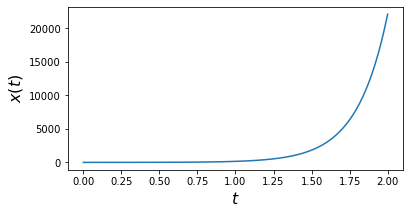

In [15]:
s1 = 5
s2 = 2

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜2秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts) #振動
plot(ts, xs)

#### 固有値＝ ( 負 , 負 ) の振動波形

* 例えば，$x(t) = \exp(-5t) + \exp(-2t)$

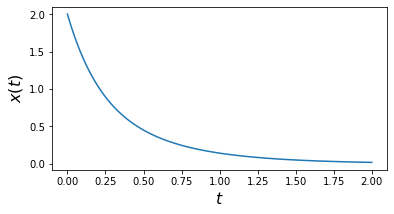

In [16]:
s1 = -5
s2 = -2

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜5秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts) #振動
plot(ts, xs)

#### 固有値＝ ( 負 , 正 ) の振動波形

* 例えば，$x(t) = \exp(-5t) + \exp(2t)$

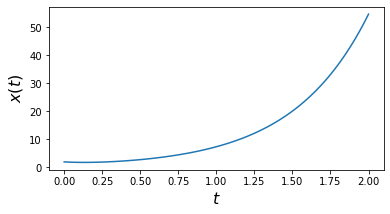

In [17]:
s1 = -5
s2 = 2

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜2秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts)
plot(ts, xs)

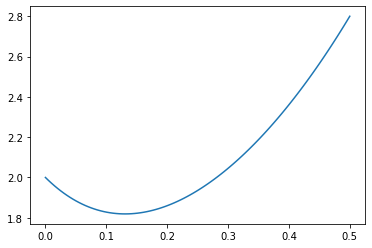

In [18]:
#原点付近を拡大
ts = np.linspace(0, 0.5, 100) #時間軸を表す等差数列　0〜0.5秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts)
plt.plot(ts, xs)

### 考察 ― (a) ２つの異なる実数根

* 実数根が全て負だと，収束する．１つでも正だと，発散する．

### (b) 重根

#### 固有値＝ 正（重根） の振動波形

* 例えば，$x(t) = \exp(5t) + \exp(5t)$

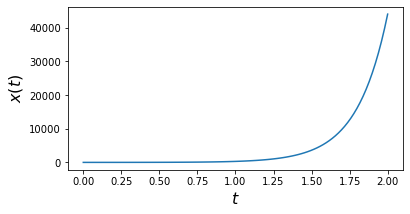

In [107]:
s1 = 5
s2 = 5

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜2秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts)
plot(ts, xs)

#### 固有値＝ 負（重根） の振動波形

* 例えば，$x(t) = \exp(-5t) + \exp(-5t)$

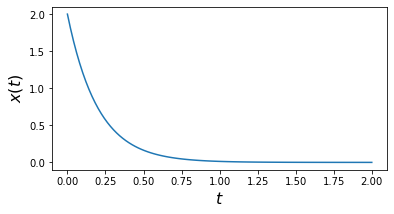

In [108]:
s1 = -5
s2 = -5

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜2秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts)
plot(ts, xs)

### 考察 ―  (b) 重根

* 「異なる２つの実数根」と同じ考察が通用する．

> ### 考察 ― (a) 異なる２つの実数根
> 
> * 実数根が全て負だと，収束する．１つでも正だと，発散する．

### (c) 共役な虚根

* 例えば，$x(t) = \exp\{(-5i) t\} + \exp\{(5i) t\}$

※Python の虚数単位は`j`

/home/yoshidak/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


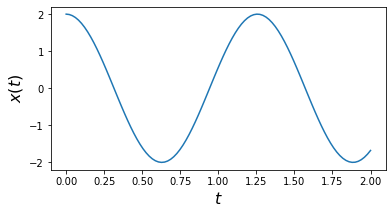

In [109]:
s1 = -5j
s2 = 5j

ts = np.linspace(0, 2, 100) #時間軸を表す等差数列　0〜2秒を100等分

xs = np.exp(s1*ts) + np.exp(s2*ts)
plot(ts, xs)

※ 複素数列をプロットすると，虚部が無効化されて，実部だけしかプロットされないよ，というワーニングが出てる．

#### 振動波形の値 `xs` を数値で見てみる．

In [110]:
xs

array([ 2.        +0.j,  1.98980563+0.j,  1.95932645+0.j,  1.90887318+0.j,
        1.83896015+0.j,  1.75030008+0.j,  1.64379681+0.j,  1.52053606+0.j,
        1.38177442+0.j,  1.22892645+0.j,  1.06355036+0.j,  0.88733204+0.j,
        0.70206794+0.j,  0.50964669+0.j,  0.31202992+0.j,  0.1112322 +0.j,
       -0.09069946+0.j, -0.2917065 +0.j, -0.48973977+0.j, -0.68278046+0.j,
       -0.86886063+0.j, -1.04608332+0.j, -1.21264184+0.j, -1.36683825+0.j,
       -1.50710061+0.j, -1.63199903+0.j, -1.74026025+0.j, -1.83078062+0.j,
       -1.90263733+0.j, -1.95509786+0.j, -1.9876274 +0.j, -1.99989433+0.j,
       -1.99177361+0.j, -1.96334801+0.j, -1.91490732+0.j, -1.84694536+0.j,
       -1.76015495+0.j, -1.65542088+0.j, -1.53381084+0.j, -1.39656457+0.j,
       -1.2450812 +0.j, -1.08090502+0.j, -0.90570969+0.j, -0.72128123+0.j,
       -0.52949976+0.j, -0.33232037+0.j, -0.13175319+0.j,  0.07015714+0.j,
        0.27135225+0.j,  0.46978111+0.j,  0.66342084+0.j,  0.85029741+0.j,
        1.02850574+0.j,  

#### 解 `xs` の虚部を見てみると，全てゼロになっている．

In [111]:
np.imag(xs)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### その一方で，解 `xs` の実部は，こんな感じで・・・

In [112]:
np.real(xs)

array([ 2.        ,  1.98980563,  1.95932645,  1.90887318,  1.83896015,
        1.75030008,  1.64379681,  1.52053606,  1.38177442,  1.22892645,
        1.06355036,  0.88733204,  0.70206794,  0.50964669,  0.31202992,
        0.1112322 , -0.09069946, -0.2917065 , -0.48973977, -0.68278046,
       -0.86886063, -1.04608332, -1.21264184, -1.36683825, -1.50710061,
       -1.63199903, -1.74026025, -1.83078062, -1.90263733, -1.95509786,
       -1.9876274 , -1.99989433, -1.99177361, -1.96334801, -1.91490732,
       -1.84694536, -1.76015495, -1.65542088, -1.53381084, -1.39656457,
       -1.2450812 , -1.08090502, -0.90570969, -0.72128123, -0.52949976,
       -0.33232037, -0.13175319,  0.07015714,  0.27135225,  0.46978111,
        0.66342084,  0.85029741,  1.02850574,  1.1962291 ,  1.35175766,
        1.49350591,  1.62002881,  1.73003653,  1.82240763,  1.89620043,
        1.95066267,  1.98523914,  1.99957734,  1.99353112,  1.9671621 ,
        1.92073912,  1.85473541,  1.76982384,  1.66687004,  1.54

#### この実部のグラフは，$\cos$関数になっている．その周波数は，固有値の虚部の絶対値（この例では＝５）．

/home/yoshidak/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


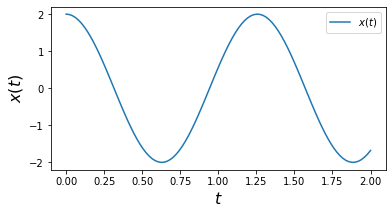

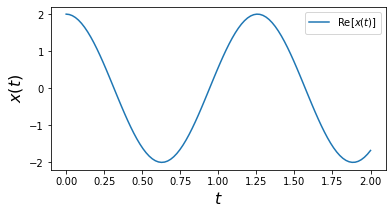

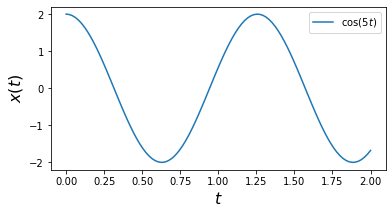

In [118]:
plot(ts, xs, label=r'$x(t)$')
plt.legend()
plot(ts, np.real(xs), label=r'Re[$x(t)$]')
plt.legend()

omega = np.abs(np.imag(s1)) #固有値の虚部の絶対値．共役だから s2 でも同じ
xcos = 2*np.cos(omega*ts)
plot(ts, xcos, label=r'$\cos(%gt)$'%(omega))
plt.legend()

※ `xs` そのもののプロットでは，ワーニングが出るが，そもそも虚部は全て0なので，グラフは同じ．

### 考察 ―  (c) 共役な虚数根

* 共役な虚数根から作った $\exp\{(-5i) t\}$ と $\exp\{(5i) t\}$ を足すと，虚部はキャンセルされて消える．
* 残った実部は，$\cos$関数になる．その周波数は，固有値の虚部の絶対値．

## 固有値によるダイナミクスの分類

### 演習3.3

質量 $m = 5.6$ kg，減衰係数 $c = 1.5$ Ns/m，ばね定数 $k = 7.8$ N/mの自由振動系の運動方程式は，

* $5.6\ddot x + 1.5\dot x + 7.8x =0$

となる．対応する固有方程式は，次の二次方程式となる．

* $5.6s^2 + 1.5 s + 7.8 =0$

上式を解くと，次の固有値が判明する．

In [12]:
np.roots([5.6, 1.5, 7.8]) #係数 5.6, 1.5, 7.8 の二次方程式の根を求める

array([-0.13392857+1.17256995j, -0.13392857-1.17256995j])

すなわち，この系の固有値は，実部$\approx -0.134$，虚部$\approx \pm 1.173$ の共役複素数である．

### 演習3.6

直前の固有値を表3.1と照合すると，実部が負で，虚部有りなので，判別結果は「減衰振動」である．